In [1]:
weather = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/weather_madrid_LEMD_1997_2015.csv")

In [2]:
weather.printSchema()

root
-- CET: timestamp (nullable = true)
-- Max TemperatureC: integer (nullable = true)
-- Mean TemperatureC: integer (nullable = true)
-- Min TemperatureC: integer (nullable = true)
-- Dew PointC: integer (nullable = true)
-- MeanDew PointC: integer (nullable = true)
-- Min DewpointC: integer (nullable = true)
-- Max Humidity: integer (nullable = true)
-- Mean Humidity: integer (nullable = true)
-- Min Humidity: integer (nullable = true)
-- Max Sea Level PressurehPa: integer (nullable = true)
-- Mean Sea Level PressurehPa: integer (nullable = true)
-- Min Sea Level PressurehPa: integer (nullable = true)
-- Max VisibilityKm: integer (nullable = true)
-- Mean VisibilityKm: integer (nullable = true)
-- Min VisibilitykM: integer (nullable = true)
-- Max Wind SpeedKm/h: integer (nullable = true)
-- Mean Wind SpeedKm/h: integer (nullable = true)
-- Max Gust SpeedKm/h: integer (nullable = true)
-- Precipitationmm: double (nullable = true)
-- CloudCover: integer (nullable = true)
-- Events: string (nullable = true)
-- WindDirDegrees: integer (nullable = true)

In [3]:
weather.take(3)

Out[ 3 ]: 
[Row(CET=datetime.datetime(1997, 1, 1, 0, 0), Max TemperatureC=7, Mean TemperatureC=4, Min TemperatureC=2, Dew PointC=5, MeanDew PointC=3, Min DewpointC=2, Max Humidity=100, Mean Humidity=95, Min Humidity=76, Max Sea Level PressurehPa=1010, Mean Sea Level PressurehPa=1008, Min Sea Level PressurehPa=1004, Max VisibilityKm=10, Mean VisibilityKm=9, Min VisibilitykM=4, Max Wind SpeedKm/h=13, Mean Wind SpeedKm/h=6, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=6, Events=None, WindDirDegrees=229),
 Row(CET=datetime.datetime(1997, 1, 2, 0, 0), Max TemperatureC=7, Mean TemperatureC=3, Min TemperatureC=0, Dew PointC=6, MeanDew PointC=3, Min DewpointC=0, Max Humidity=100, Mean Humidity=92, Min Humidity=71, Max Sea Level PressurehPa=1007, Mean Sea Level PressurehPa=1003, Min Sea Level PressurehPa=997, Max VisibilityKm=10, Mean VisibilityKm=9, Min VisibilitykM=4, Max Wind SpeedKm/h=26, Mean Wind SpeedKm/h=8, Max Gust SpeedKm/h=47, Precipitationmm=0.0, CloudCover=5, Events='Rain', WindDirDegrees=143),
 Row(CET=datetime.datetime(1997, 1, 3, 0, 0), Max TemperatureC=5, Mean TemperatureC=3, Min TemperatureC=2, Dew PointC=5, MeanDew PointC=1, Min DewpointC=-1, Max Humidity=100, Mean Humidity=85, Min Humidity=70, Max Sea Level PressurehPa=1005, Mean Sea Level PressurehPa=999, Min Sea Level PressurehPa=996, Max VisibilityKm=10, Mean VisibilityKm=10, Min VisibilitykM=7, Max Wind SpeedKm/h=27, Mean Wind SpeedKm/h=19, Max Gust SpeedKm/h=None, Precipitationmm=0.0, CloudCover=6, Events='Rain-Snow', WindDirDegrees=256)]

In [4]:
weather.registerTempTable("weatherT")
res1 = sqlContext.sql("SELECT CET, `Max TemperatureC` FROM weatherT")
res1.show()

+-------------------+----------------+
 CET|Max TemperatureC|
+-------------------+----------------+
1997-01-01 00:00:00| 7|
1997-01-02 00:00:00| 7|
1997-01-03 00:00:00| 5|
1997-01-04 00:00:00| 7|
1997-01-05 00:00:00| 2|
1997-01-06 00:00:00| 7|
1997-01-07 00:00:00| 2|
1997-01-08 00:00:00| 8|
1997-01-09 00:00:00| 12|
1997-01-10 00:00:00| 13|
1997-01-11 00:00:00| 16|
1997-01-12 00:00:00| 17|
1997-01-13 00:00:00| 15|
1997-01-14 00:00:00| 11|
1997-01-15 00:00:00| 11|
1997-01-16 00:00:00| 12|
1997-01-17 00:00:00| 13|
1997-01-18 00:00:00| 6|
1997-01-19 00:00:00| 9|
1997-01-20 00:00:00| 9|
+-------------------+----------------+
only showing top 20 rows

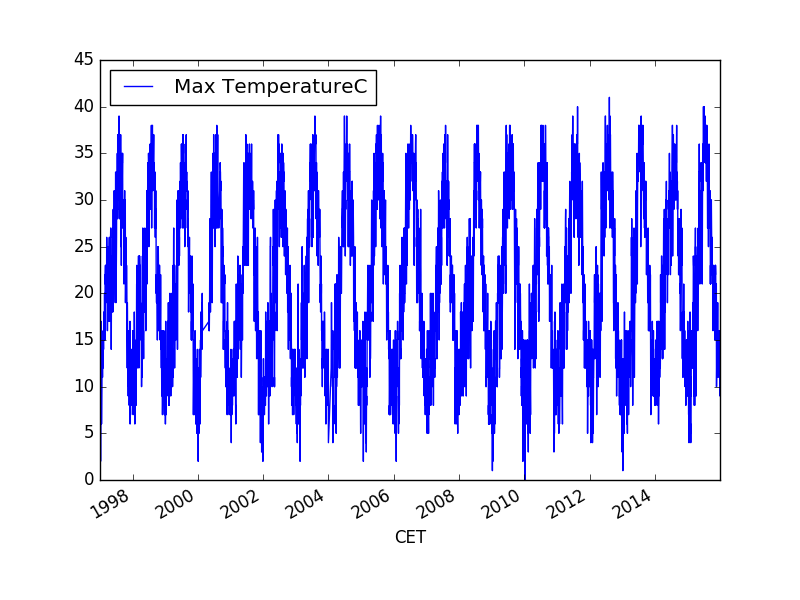

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.clf()
pdDF = res1.toPandas()
pdDF.plot(x='CET', y='Max TemperatureC')
display()

In [6]:
#pdDF.plot.scatter(x="x", y="y")  # ???
#display()

In [7]:
stations = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/stations.csv")
stations.printSchema()

root
-- id: integer (nullable = true)
-- name: string (nullable = true)
-- address: string (nullable = true)
-- lon: double (nullable = true)
-- lat: double (nullable = true)
-- elevation: integer (nullable = true)

In [8]:
stations.registerTempTable("stationsT")
res1 = sqlContext.sql("SELECT name, elevation FROM stationsT")
res1.show()

+--------------------+---------+
 name|elevation|
+--------------------+---------+
 Pza. de España| 635|
 Escuelas Aguirre| 670|
 Avda. Ramón y Cajal| 708|
 Arturo Soria| 693|
 Villaverde| 604|
 Farolillo| 630|
 Casa de Campo| 642|
 Barajas Pueblo| 621|
 Pza. del Carmen| 659|
 Moratalaz| 685|
 Cuatro Caminos| 698|
 Barrio del Pilar| 674|
 Vallecas| 677|
 Mendez Alvaro| 599|
 Castellana| 676|
 Parque del Retiro| 662|
 Plaza Castilla| 728|
Ensanche de Vallecas| 627|
 Urb. Embajada| 618|
Pza. Fernández La...| 604|
+--------------------+---------+
only showing top 20 rows

In [9]:
air_2001 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2001.csv")
air_2002 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2002.csv")
air_2003 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2003.csv")
air_2004 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2004.csv")
air_2005 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2005.csv")
air_2006 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2006.csv")
air_2007 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2007.csv")
air_2008 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2008.csv")
air_2009 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2009.csv")
air_2010 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2010.csv")
air_2011 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2011.csv")
air_2012 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2012.csv")
air_2013 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2013.csv")
air_2014 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2014.csv")
air_2015 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2015.csv")
air_2016 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2016.csv")
air_2017 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2017.csv")
air_2018 = sqlContext.read.format("com.databricks.spark.csv").option("header","true").option("inferSchema","true").load("/FileStore/tables/Madrid/madrid_2018.csv")


In [10]:
air_2001.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [11]:
air_df1 = air_2001.unionByName(air_2002).unionByName(air_2003)
air_df2 = air_2004.unionByName(air_2005).unionByName(air_2006).unionByName(air_2007).unionByName(air_2008).unionByName(air_2009).unionByName(air_2010)
air_df3 = air_2011.unionByName(air_2012).unionByName(air_2013).unionByName(air_2014).unionByName(air_2015).unionByName(air_2016)
air_df4 = air_2017.unionByName(air_2018)
air_df1.printSchema()
air_df2.printSchema()
air_df3.printSchema()
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- MXY: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- OXY: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- PXY: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CH4: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO: double (nullable = true)
-- NO_2: double (nullable = true)
-- NOx: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- PM25: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [12]:
common_columns = list(set(air_df1.columns).intersection(air_df2.columns).intersection(air_df3.columns).intersection(air_df4.columns))
print(common_columns)

['EBE', 'NMHC', 'TCH', 'SO_2', 'date', 'station', 'O_3', 'TOL', 'BEN', 'PM10', 'NO_2', 'CO']

In [13]:
for column in list(set(air_df1.columns) - set(common_columns)):
  air_df1 = air_df1.drop(column)
air_df1.printSchema()
for column in list(set(air_df2.columns) - set(common_columns)):
  air_df2 = air_df2.drop(column)
air_df2.printSchema()
for column in list(set(air_df3.columns) - set(common_columns)):
  air_df3 = air_df3.drop(column)
air_df3.printSchema()
for column in list(set(air_df4.columns) - set(common_columns)):
  air_df4 = air_df4.drop(column)
air_df4.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [14]:
air_df = air_df1.unionByName(air_df2).unionByName(air_df3).unionByName(air_df4)
air_df.printSchema()

root
-- date: timestamp (nullable = true)
-- BEN: double (nullable = true)
-- CO: double (nullable = true)
-- EBE: double (nullable = true)
-- NMHC: double (nullable = true)
-- NO_2: double (nullable = true)
-- O_3: double (nullable = true)
-- PM10: double (nullable = true)
-- SO_2: double (nullable = true)
-- TCH: double (nullable = true)
-- TOL: double (nullable = true)
-- station: integer (nullable = true)

In [15]:
#air_df = air_df.dropDuplicates()
air_df.registerTempTable("airT")
res1 = sqlContext.sql("SELECT count(*) FROM airT")
res1.show()

+--------+
count(1)|
+--------+
 3808224|
+--------+

In [16]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018.csv", True)
#air_df.repartition(1).write.csv("/FileStore/tables/Madrid/madrid_2001-2018", sep=",",header = 'true')
air_df.write.csv("/FileStore/tables/Madrid/madrid_2001-2018.csv", sep=",",header = 'true')

In [17]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.csv

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_committed_4407718912327072206,_committed_4407718912327072206,9681
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/_started_4407718912327072206,_started_4407718912327072206,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00000-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-279-c000.csv,part-00000-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-279-c000.csv,4897168
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00001-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-280-c000.csv,part-00001-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-280-c000.csv,4905990
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00002-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-281-c000.csv,part-00002-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-281-c000.csv,4911543
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00003-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-282-c000.csv,part-00003-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-282-c000.csv,4910679
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00004-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-283-c000.csv,part-00004-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-283-c000.csv,4912339
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00005-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-284-c000.csv,part-00005-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-284-c000.csv,4922796
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.csv/part-00006-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-285-c000.csv,part-00006-tid-4407718912327072206-6eba95ac-8239-477f-8999-e34f2299bea6-285-c000.csv,4924348


In [18]:
dbutils.fs.rm("/FileStore/tables/Madrid/madrid_2001-2018.parquet", True)
air_df.write.parquet("/FileStore/tables/Madrid/madrid_2001-2018.parquet")

In [19]:
%fs ls /FileStore/tables/Madrid/madrid_2001-2018.parquet

path,name,size
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_SUCCESS,_SUCCESS,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_committed_6845938747670192572,_committed_6845938747670192572,10902
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/_started_6845938747670192572,_started_6845938747670192572,0
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00000-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-390-c000.snappy.parquet,part-00000-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-390-c000.snappy.parquet,515215
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00001-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-391-c000.snappy.parquet,part-00001-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-391-c000.snappy.parquet,538323
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00002-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-392-c000.snappy.parquet,part-00002-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-392-c000.snappy.parquet,519731
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00003-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-393-c000.snappy.parquet,part-00003-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-393-c000.snappy.parquet,533226
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00004-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-394-c000.snappy.parquet,part-00004-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-394-c000.snappy.parquet,553471
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00005-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-395-c000.snappy.parquet,part-00005-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-395-c000.snappy.parquet,552576
dbfs:/FileStore/tables/Madrid/madrid_2001-2018.parquet/part-00006-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-396-c000.snappy.parquet,part-00006-tid-6845938747670192572-dfdf85f3-87b6-483e-9a2d-6dec22ec613d-396-c000.snappy.parquet,559760


In [20]:
air_df.take(3)

Out[ 16 ]: 
[Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, station=28079035),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, station=28079003)]

In [21]:
airRDD = air_df.rdd

In [22]:
airRDD.take(3)

Out[ 18 ]: 
[Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, station=28079035),
 Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, station=28079003)]

In [23]:
import datetime
from pyspark import sql

def replace_date (zeile):
  datum = zeile["date"]
  z = zeile.asDict()
  z['date'] = datum.replace(hour=0, minute=0)
  return sql.types.Row(**z)
  
  
#test_row = sql.Row(date=datetime.datetime(2001, 8, 1, 1, 0), BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, station=28079001)
#print(test_row)
#print(replace_date(test_row))


In [24]:
airRDD_new = airRDD.map(lambda x: replace_date(x))
airRDD_new.take(3)

Out[ 51 ]: 
[Row(BEN=None, CO=0.3700000047683716, EBE=None, NMHC=None, NO_2=58.400001525878906, O_3=34.529998779296875, PM10=105.0, SO_2=6.340000152587891, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079001),
 Row(BEN=1.5, CO=0.3400000035762787, EBE=1.4900000095367432, NMHC=0.07000000029802322, NO_2=56.25, O_3=42.15999984741211, PM10=100.5999984741211, SO_2=8.109999656677246, TCH=1.2400000095367432, TOL=10.819999694824219, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079035),
 Row(BEN=None, CO=0.2800000011920929, EBE=None, NMHC=None, NO_2=50.65999984741211, O_3=46.310001373291016, PM10=100.0999984741211, SO_2=7.849999904632568, TCH=None, TOL=None, date=datetime.datetime(2001, 8, 1, 0, 0), station=28079003)]

In [25]:
air_df_new = spark.createDataFrame(airRDD_new)
air_df_new.createOrReplaceTempView("airRDD_new")
air_df_new.count()

Out[ 57 ]: 3808224

In [26]:
air_df_grouped = air_df_new.groupBy('date').agg({'CO': 'mean', 'EBE': 'mean'})

In [27]:
air_df_grouped.take(3)

Out[ 68 ]: 
[Row(date=datetime.datetime(2001, 8, 15, 0, 0), avg(EBE)=2.695916660875082, avg(CO)=0.4479347833439006),
 Row(date=datetime.datetime(2001, 8, 16, 0, 0), avg(EBE)=1.6902290054860005, avg(CO)=0.4393605682237957),
 Row(date=datetime.datetime(2001, 9, 4, 0, 0), avg(EBE)=2.5884027832912073, avg(CO)=0.6744639710154915)]